<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h3> Práctico 3 y 4 - Introducción al aprendizaje automático - Aprendizaje Supervisado - 2019 </h3>

###### Integrante: 
* Tarletta Juan

Trabajaremos con el mismo dataset utilizado en curación de datos (deben utilizar el dataset que se encuentra con los datos modificados o bien aplicar los mismos métodos del trabajo anterior para contar con datos válidos)

El dataset cuenta con X features, siendo las más importantes

* Componente: Indica a que componente pertenece la muestra
* Horas Funcionamiento: Indica la cantidad de horas de funcionamiento del camión (sería como el kilometraje de los camiones)
* Horas del Aceite: Representa la cantidad de horas de utilización del aceite (este dato es importante dado que a medida que, a mayor horas de uso del aceite, el mismo comienza a desgastarse)
* Resultado: (El laboratorio indica si la muestra de aceite está Bien = 1, Regular=2, Mal=3)
* St: Presencia de Hollin en el Aceite
* Al:  Presencia de Aluminio en el Aceite
* Fe	 Presencia de Hierro en el Aceite
* Si  Presencia de Silicio en el Aceite
* Na	 Presencia de Sodio en el Aceite


NOTA: se modifica le dataset y se incluyen el feature
* Fecha de Análisis: Indica cuando fué analizada la muestra por el laboratorio





In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from IPython.display import display, Markdown

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pd.read_csv('dataset_intro.csv')
important_cols= ['Equipo', 'Componente','Resultado','Horas Funcionamiento','Horas del Aceite', 'St', 'Al', 'Fe', 'Si', 'Na' ]

#dataset[important_cols]

In [4]:
dataset[['Na']].count()

Na    21432
dtype: int64

El objetivo del práctico es utilizar gridSearch para encontrar los mejores hiperparámetros y función de coste como lo vieron en la notebook Clase 3 - Metricas y validacion de resultados.ipynb

Deben tomar los datos de un solo componente para que los parámetros seán comparables (seleccionar el componente para el que exista la mayor cantidad de muestras en el dataset)

Evaluen diferentes funciones de coste y para cada uno de ellos diferentes hiperparámetros.

Determinar cual es el mejor set de hiperparámetros para clasificar las muestras de aceite

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(1234)

%matplotlib inline

In [6]:
#Obtenemos el componente con más apariciones
compo = dataset[['Componente']].mode()
display(compo)

,Componente
0,Motor


In [7]:
#Redefinimos el dataset a utilizar, en este caso solo con el componente Motor
dataset = dataset[dataset['Componente'] == 'Motor']
dataset.head(5)

,Unnamed: 0,Equipo,Componente,Id,Resultado,Horas Funcionamiento,Horas del Aceite,Fecha de Análisis,B,Nit,...,Zn,Ag,Ti,V40,V100,TBN,TAN,ISO14,ISO4,ISO6
3,3,1355,Motor,76.084008,3.0,21950.0,409.0,2019-02-20,51.0,9.0,...,1089.0,0.0,0.0,NaN,13.7,9.1,NaN,NaN,NaN,NaN
12,12,1357,Motor,41.099310,1.0,27876.0,263.0,2017-11-05,NaN,6.0,...,1246.0,0.0,0.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
29,29,1356,Motor,82.751875,3.0,28295.0,NaN,2019-05-17,47.0,10.0,...,1122.0,0.0,0.0,NaN,14.2,10.4,NaN,NaN,NaN,NaN
49,49,1355,Motor,79.207921,3.0,22729.0,380.0,2019-04-03,100.0,6.0,...,1334.0,0.0,0.0,NaN,14.1,9.8,NaN,NaN,NaN,NaN
50,50,1355,Motor,82.456346,2.0,23153.0,424.0,2019-05-12,105.0,8.0,...,1331.0,0.0,0.0,NaN,14.3,9.6,NaN,NaN,NaN,NaN


In [8]:
dataset.columns

Index(['Unnamed: 0', 'Equipo', 'Componente', 'Id', 'Resultado',
       'Horas Funcionamiento', 'Horas del Aceite', 'Fecha de Análisis', 'B',
       'Nit', 'Oxi', 'Sul', 'St', 'V', 'Al', 'Cr', 'Cu', 'Fe', 'Pb', 'Mo',
       'Ni', 'Sn', 'Si', 'K', 'Na', 'W', 'F', 'A', 'ISO', 'PQI', 'Ba', 'Ca',
       'Mg', 'Mn', 'P', 'Zn', 'Ag', 'Ti', 'V40', 'V100', 'TBN', 'TAN', 'ISO14',
       'ISO4', 'ISO6'],
      dtype='object')

In [9]:
#utilizamos los datos que estan completos
dataset_reduce = dataset[['Horas Funcionamiento','Horas del Aceite','Sul', 'V', 'Cr','Cu','Pb','Mo','Ni','K','St','PQI','Al', 'Fe', 'Si','Ca','Na','Mg', 'Zn','V100','B','Oxi','P']].dropna()
index_dataset_reduce = dataset_reduce.index.values.astype(int)
index_dataset_reduce.shape

(1982,)

In [10]:
#Separamos entre Datos y objetivo 

X = dataset_reduce[['Horas Funcionamiento','Horas del Aceite', 'Sul', 'V', 'Cr','Cu','Pb','Mo','Ni','K','St','PQI','Al', 'Fe', 'Si','Ca','Na','Mg', 'Zn','V100','B','Oxi','P']]
y = dataset[['Resultado']].ix[index_dataset_reduce]
#display(X.shape,y.shape,X,y)


C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [11]:
#Vemos la cantidad total de cada resultado
dataset[dataset['Resultado']==1.0].shape[0], dataset[dataset['Resultado']==2.0].shape[0], dataset[dataset['Resultado']==3.0].shape[0]

(1543, 509, 435)

In [12]:
#Vemos la cantidad de cada resultado luego del dropna
y[y['Resultado']==1.0].shape[0],y[y['Resultado']==2.0].shape[0],y[y['Resultado']==3.0].shape[0]

(1173, 488, 321)

In [13]:
#Separamos los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27)

#Vemos como queda la distribucion de objetivos
y_train[y_train==1.0].shape[0],y_train[y_train['Resultado']==2.0].shape[0],y_train[y_train['Resultado']==3.0].shape[0],y_test[y_test==1.0].shape[0],y_test[y_test['Resultado']==2.0].shape[0],y_test[y_test['Resultado']==3.0].shape[0]

(1446, 349, 218, 536, 139, 103)

C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-d

# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.362 (+/-0.046) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.467 (+/-0.040) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.546 (+/-0.016) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.371 (+/-0.042) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.421 (+/-0.043) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.448 (+/-0.032) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.450 (+/-0.032) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.335 (+/-0.033) para los parámetros {'alpha': 0.001, 'eta0': 0.0

C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-d

# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.490 (+/-0.035) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.552 (+/-0.016) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.418 (+/-0.045) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.437 (+/-0.039) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.389 (+/-0.039) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.444 (+/-0.031) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.371 (+/-0.042) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.504 (+/-0.028) para los parámetros {'alpha': 0.001, 'eta0': 0.01, 

C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-d

# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.498 (+/-0.026) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.482 (+/-0.033) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.487 (+/-0.034) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.355 (+/-0.046) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.421 (+/-0.044) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.490 (+/-0.025) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.494 (+/-0.026) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.611 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0

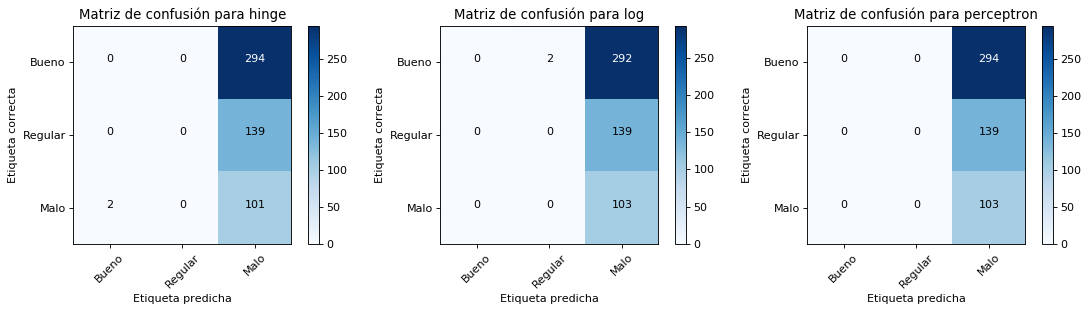

In [14]:
#Realizamos las iteraciones como en el práctico de intro al aprendizaje
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=7, scoring='accuracy')
    model.fit(X_train, y_train.values.ravel())
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=['Bueno','Regular','Malo'], title="Matriz de confusión para %s" % loss)

*A continuación realizaremos predicciones en base a lo que hemos visto de Aprendizaje Supervisado e intentaremos mejorar el pronóstico*

# Exploración de hiperparámetros para función de medida "gini"

Mejor conjunto de parámetros:
{'max_depth': 15, 'n_estimators': 200}

Puntajes de la grilla:

Exactitud: 0.846 (+/-0.001) para los parámetros {'max_depth': 10, 'n_estimators': 100}
Exactitud: 0.842 (+/-0.001) para los parámetros {'max_depth': 10, 'n_estimators': 200}
Exactitud: 0.840 (+/-0.001) para los parámetros {'max_depth': 10, 'n_estimators': 300}
Exactitud: 0.844 (+/-0.001) para los parámetros {'max_depth': 15, 'n_estimators': 100}
Exactitud: 0.848 (+/-0.001) para los parámetros {'max_depth': 15, 'n_estimators': 200}
Exactitud: 0.843 (+/-0.001) para los parámetros {'max_depth': 15, 'n_estimators': 300}
Exactitud: 0.839 (+/-0.001) para los parámetros {'max_depth': 20, 'n_estimators': 100}
Exactitud: 0.840 (+/-0.001) para los parámetros {'max_depth': 20, 'n_estimators': 200}
Exactitud: 0.846 (+/-0.001) para los parámetros {'max_depth': 20, 'n_estimators': 300}

Reporte de clasificación para el mejor clasificador (sobre

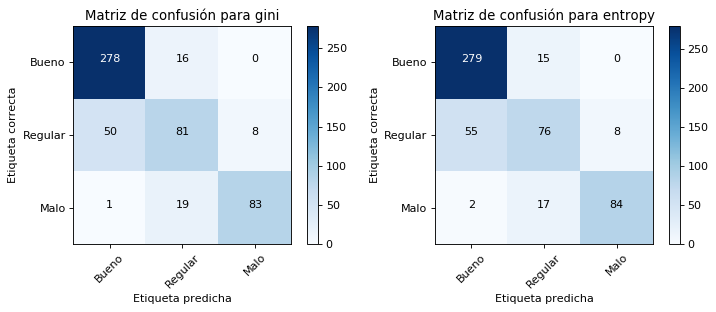

In [15]:
#Realizamos las iteraciones como en el práctico de intro pero utilizando un modelo de ensamble
from sklearn.ensemble import RandomForestClassifier as RFC


plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, criterion in enumerate(('gini', 'entropy'), start=1):
    exploring_params = {
        'n_estimators': [100,200,300], #Cantidad de arboles
        'max_depth': [10,15,20],  # Profundidad del arbol
    }
    m = RFC(criterion=criterion)
    model = GridSearchCV(m, exploring_params, cv=7, scoring='accuracy')
    model.fit(X_train, y_train.values.ravel())
    
    print("# Exploración de hiperparámetros para función de medida \"%s\"" % criterion, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=['Bueno','Regular','Malo'], title="Matriz de confusión para %s" % criterion)

*Podemos observar que mejoramos las predicciónes enormemente*